## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
"""
1. identify what films are doing the best 
   - ratings 
   - gross revenue
2. what films should the company create
   - genre
3. movie vs budget 
4. recommend partnering with successfull actors/directors/writers
5. average run time 
6. movie vs rating(age)
"""

'\n1. identify what films are doing the best \n   - ratings \n   - gross revenue\n2. what films should the company create\n   - genre\n3. movie vs budget \n4. recommend partnering with successfull actors/directors/writers\n5. average run time \n6. movie vs rating(age)\n'

In [2]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Creating a connection to the database
conn = sqlite3.connect("zippedData/im.db/im.db")

In [4]:
#Loading the tables from the database
im=pd.read_sql("""SELECT * FROM sqlite_master""", conn)
im

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [5]:
#Displaying the movie basics table
movie_basics=pd.read_sql("""SELECT * FROM movie_basics""", conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [6]:
#Displaying the movie ratings table
movie_ratings=pd.read_sql("""SELECT * FROM movie_ratings""", conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [7]:
#Displaying the directors table
directors=pd.read_sql("""SELECT * FROM directors""", conn)
directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


**Cleaning The Datasets**

In [9]:
# Merge movie_basics and movie_ratings on 'movie_id'
# both tables are from the same database and share primary and foreign keys and explain one information
rating_movie_df=pd.merge(movie_basics, movie_ratings, on='movie_id', how='left');
rating_movie_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN


In [10]:
#rating_movie_df
#checking for null values
rating_movie_df.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
averagerating      72288
numvotes           72288
dtype: int64

In [11]:
#Checking the summary statistics of our data 
rating_movie_df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,146144.000000,114405.000000,73856.000000,7.385600e+04
mean,2014.621798,86.187247,6.332729,3.523662e+03
std,2.733583,166.360590,1.474978,3.029402e+04
min,2010.000000,1.000000,1.000000,5.000000e+00
25%,2012.000000,70.000000,5.500000,1.400000e+01
50%,2015.000000,87.000000,6.500000,4.900000e+01
75%,2017.000000,99.000000,7.400000,2.820000e+02
max,2115.000000,51420.000000,10.000000,1.841066e+06


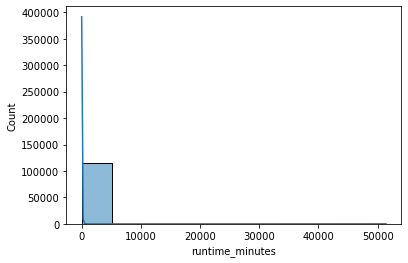

In [12]:
#checking for distribution of column values with nulls
sns.histplot(data=rating_movie_df,x='runtime_minutes',kde=True,bins=10)
plt.show()

In [13]:
"""
The runtime is right skewed hence we replace null values with median
"""

'\nThe runtime is right skewed hence we replace null values with median\n'

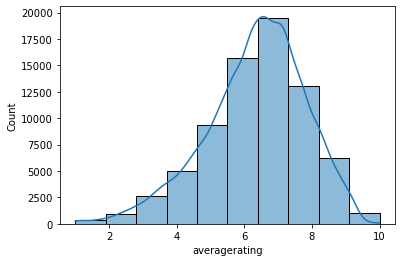

In [14]:
sns.histplot(data=rating_movie_df,x='averagerating',kde=True,bins=10)
plt.show();

In [15]:
"""
The average rating column is normally distributed hence replace null values with mean
"""

'\nThe average rating column is normally distributed hence replace null values with mean\n'

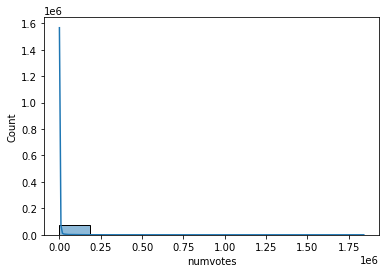

In [16]:
sns.histplot(data=rating_movie_df,x='numvotes',kde=True,bins=10)
plt.show();

In [17]:
"""
The numvotes column is right skewed hence replace null values with the median
"""

'\nThe numvotes column is right skewed hence replace null values with the median\n'

In [18]:
#Filling in the missing values in the rating_movie_df
#Original column
#Since this column is a title, you can use primary_title values as a fill for the missing entries, as it’s reasonable to assume that if an original title is missing, the primary title may be similar.
rating_movie_df['original_title'].fillna(rating_movie_df['primary_title'], inplace=True)

#runtime column
# Fill missing runtime_minutes with the overall median runtime
rating_movie_df['runtime_minutes'].fillna(rating_movie_df['runtime_minutes'].median(), inplace=True)

#Genre column
#Use a placeholder like "Unknown", as filling this with an actual genre could mislead the data analysis.
rating_movie_df['genres'].fillna("Unknown", inplace=True)

# Fill missing values in averagerating and numvotes with their respective overall means and median
rating_movie_df['averagerating'].fillna(rating_movie_df['averagerating'].mean(), inplace=True)
rating_movie_df['numvotes'].fillna(rating_movie_df['numvotes'].median(), inplace=True)

In [19]:
#Confirming if the columns have know no missing values
rating_movie_df.isnull().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [20]:
#Checking for duplicates
rating_movie_df.duplicated().sum()

0

In [21]:
#Checking how our data looks like
rating_movie_df.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.000000,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.200000,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.900000,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.100000,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.500000,119.0
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,6.332729,49.0
6,tt0112502,Bigfoot,Bigfoot,2017,87.0,"Horror,Thriller",4.100000,32.0
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.100000,263.0
8,tt0139613,O Silêncio,O Silêncio,2012,87.0,"Documentary,History",6.332729,49.0
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography,6.332729,49.0


In [22]:
#confirming data types for the different columns
rating_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146144 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  146144 non-null  float64
 5   genres           146144 non-null  object 
 6   averagerating    146144 non-null  float64
 7   numvotes         146144 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 10.0+ MB


In [23]:
#The second dataset for the analysis
budget=pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [24]:
# Checking the null values in the tn.movie_budgets file 
budget.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [25]:
#Checking for duplicate values
budget.duplicated().sum()

0

In [26]:
#Converting into a date time format 
budget['release_date']=pd.to_datetime(budget['release_date'])

In [27]:
# creating a column for year
budget['year']=budget['release_date'].dt.year

In [28]:
#creating a column for month 
budget['month']=budget['release_date'].dt.month

In [29]:
#Checking how our data looks like
budget.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,5
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,6
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017,12
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",2015,12
6,7,2018-04-27,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",2018,4
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425",2007,5
8,9,2017-11-17,Justice League,"$300,000,000","$229,024,295","$655,945,209",2017,11
9,10,2015-11-06,Spectre,"$300,000,000","$200,074,175","$879,620,923",2015,11


In [30]:
#checking the data types for the different columns
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   object        
 6   year               5782 non-null   int64         
 7   month              5782 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 361.5+ KB


In [31]:
#Changing the production budget column data type and replacing the dollar sign with an empty space for modeling
budget['production_budget']=budget['production_budget'].replace('[\$,]','', regex=True).astype(int)

In [32]:
#Changing the worldwide gross column data type and replacing the dollar sign with an empty space for modeling
budget['worldwide_gross']=budget['worldwide_gross'].replace('[\$,]','', regex=True).astype(float)

In [33]:
#Confirming the unique values in the worldwide gross column
budget['worldwide_gross'].value_counts()

0.0            367
8000000.0        9
7000000.0        6
2000000.0        6
9000000.0        4
              ... 
18524496.0       1
85632458.0       1
527079962.0      1
261443242.0      1
124827316.0      1
Name: worldwide_gross, Length: 5356, dtype: int64

****DATA ANALYSIS****

**OBJECTIVES***
1. What types of films are doing best in box office?
2. What types of films should the company prioritize producing?
3. Who are some of the most popular directors/writers that the company might consider collaborating with or hiring?
4. What are the preferred film runtimes for audiences?
5. Who are some of the most popular actors the company should consider casting to attract a dedicated audience base?
6. What is the average production budget the company should expect?
7. What is the average returns of films?
8. What has been the trend of genre production over the years?
9.Trends in Movie performance based on release date
10. linear regression, .Relationship between movie budget and worldwide gross
11. .Relationship between movies runtime and average ratings of movies

1. genre vs rating
- will answer question 1,2 and 3
2. 4 and 12
- linear regression/scatter plot
3. for question6, plot histogram for count of means
4. for question 8, plot histogram for the count of means for the worldwide gross
5. plot line graph for genre performance over the years genre and year
6. plot month verses the worldwide gross
7. linear regression, .Relationship between movie budget and worldwide gross

**Linear Regression Model of the Relationship Between Production Budget and Worldwide Gross Revenue**

In [35]:
#Defining the variables
x_1=budget['production_budget'] #Independent variable
y_1=budget['worldwide_gross'] #Dependent variable

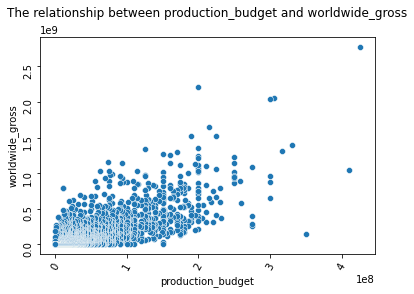

In [36]:
#Visualizing the relationship between the independent and the dependent variable using a scatter plot
plt.figsize=(16,16)
sns.scatterplot(x=x_1,y=y_1)
plt.xticks(rotation=60)  # Rotate x-axis labels by 60 degrees
plt.yticks(rotation=90) #Rotate y-axis labels by 90 degrees
plt.title('The relationship between production_budget and worldwide_gross', pad=20)
#Used pad to set a distance between the title and the start point of my plot.
plt.show();

**Interpretation**

1. The scatter plot presents to have a not so perfect linear relationship between the variables but there is a positive 
relationship between production budget and wordwide gross revenue.

In [37]:
#Building the model
X=np.array(x_1).flatten() #Changing the variable into a 1-D array
model=sm.OLS(endog=y_1,exog=sm.add_constant(X))
model

In [38]:
#Fitting the model
results=model.fit()
results

In [39]:
#Evaluating the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        worldwide_gross   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     7355.
Date:                Wed, 30 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:52:31   Log-Likelihood:            -1.1557e+05
No. Observations:                5782   AIC:                         2.311e+05
Df Residuals:                    5780   BIC:                         2.311e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.286e+06   1.91e+06     -3.813      0.000    -1.1e+07   -3.54e+06
x1             3.1269      0.036     85.763      0.000       3.055       3.198
==============================================================================
Omnibus:                     4232.022   Durbin-Watson:                   1.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           172398.262
Skew:                           3.053   Prob(JB):                         0.00
Kurtosis:                      29.044   Cond. No.                     6.57e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.57e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Interpreting the Model**

1. The overall model and our coefficients are statistically significant, with a p_value of less than the standard alpha 0.05. This implies that the the production budget is significantly related to the worldwide Gross Revenue.
2. The R-squared is 0.560 which implies that there is a 56% of the variability in worldwide_gross which can be explained by the production budget. Similarly, the R-squared value also implies that the model is a moderate fit.
3. The const(intercept) implies that if the company operates with a zero production budget, thwy would incur a loss of -$7,286,000.
4.The coefficient for the production budget (x1) is 3.1269. This implies that the company should expect approximately a 3.13% increase of the worldwide gross revenue for every 1% increase of the production budget.

This tells that if the company was to increase the production budget by $1 million,they would expect a worldwide gross to increase by about $313,000.

**Checking the model fit**

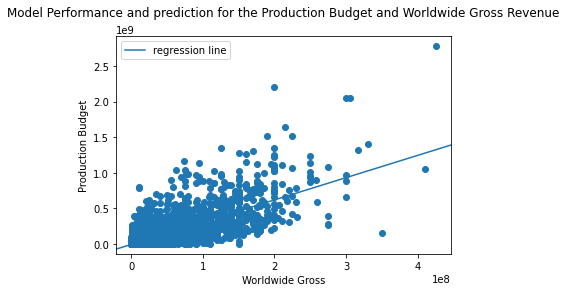

In [40]:
# Visualize model fit
fig, ax=plt.subplots()
ax.scatter(X,y_1)
sm.graphics.abline_plot(model_results=results,label='regression line',ax=ax)
plt.title('Model Performance and prediction for the Production Budget and Worldwide Gross Revenue',pad=20)
ax.set_ylabel('Production Budget')
ax.set_xlabel('Worldwide Gross')
ax.legend()
plt.show();

**Interpretation**

1.The upward slope of the regression line indicates a positive relationship between Production Budget and Worldwide Gross. 
This suggests that, on average, as the production budget increases, the worldwide gross revenue tends to increase as well.


2.Visually, regression line depicts line of best fit illustrating how well our model is performing.
Since most values are closely scattered around the regression line, it indicates that the model provides reasonably accurate 
predictions of worldwide gross revenue based on production budget. 
However, the presence of some scattered points, especially at higher budget levels, suggests that there are other 
influencing factors not captured by this model, indicating room for further exploration and improvement.

**Recommendation based on the model Analysis**

Based on the analysis, we recommended that the company should consider increasing the production budget, as even a modest increase is likely to yield a proportional rise in worldwide gross revenue, enhancing overall profitability.